In [8]:
# Importing basic data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Yahoo! Finance and datatime Packages to handle Crude Oil Data
import yfinance as yf
from datetime import datetime
from datetime import timedelta

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Collection

In [9]:
# Reading the data in

# Define the ticker symbol for crude oil
ticker_symbol = "CL=F"  # CL=F is the ticker symbol for WTI Crude Oil futures on Yahoo Finance

# Set the start date
start_date = "2000-01-01"

# Set the end date as the current date
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


# Data Cleaning and Preparation

In [10]:
print("Missing Values in the data")
print(data.isnull().sum())
print("--------------------------")

print("Statistical Summary of the collected data")
print(data.describe())

Missing Values in the data
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
--------------------------
Statistical Summary of the collected data
              Open         High          Low        Close    Adj Close  \
count  5941.000000  5941.000000  5941.000000  5941.000000  5941.000000   
mean     64.378037    65.375630    63.309286    64.372250    64.372250   
std      25.348592    25.620875    25.047044    25.357240    25.357240   
min     -14.000000    13.690000   -40.320000   -37.630001   -37.630001   
25%      45.160000    46.130001    44.200001    45.200001    45.200001   
50%      62.669998    63.590000    61.799999    62.759998    62.759998   
75%      83.529999    84.830002    82.150002    83.540001    83.540001   
max     145.190002   147.270004   143.220001   145.289993   145.289993   

             Volume  
count  5.941000e+03  
mean   3.037217e+05  
std    2.127166e+05  
min    0.000000e+00  
25%    1.175960e+05  
50

# Exploratory Data Analysis

## Correlation Matrix

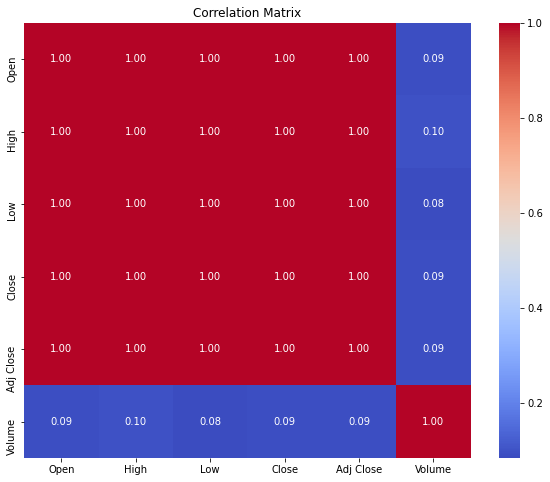

In [11]:
# Build the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

del correlation_matrix

## Seasonality Decomposition

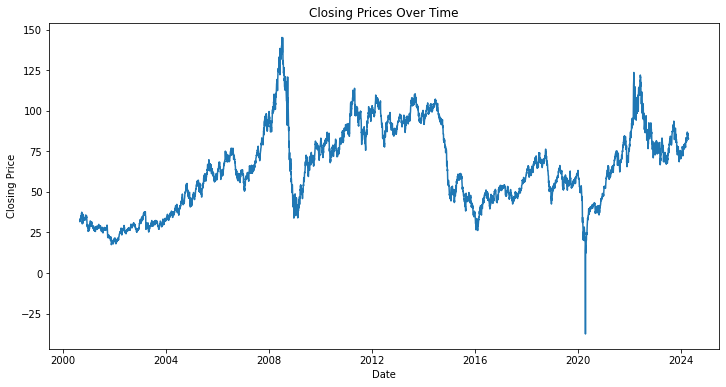

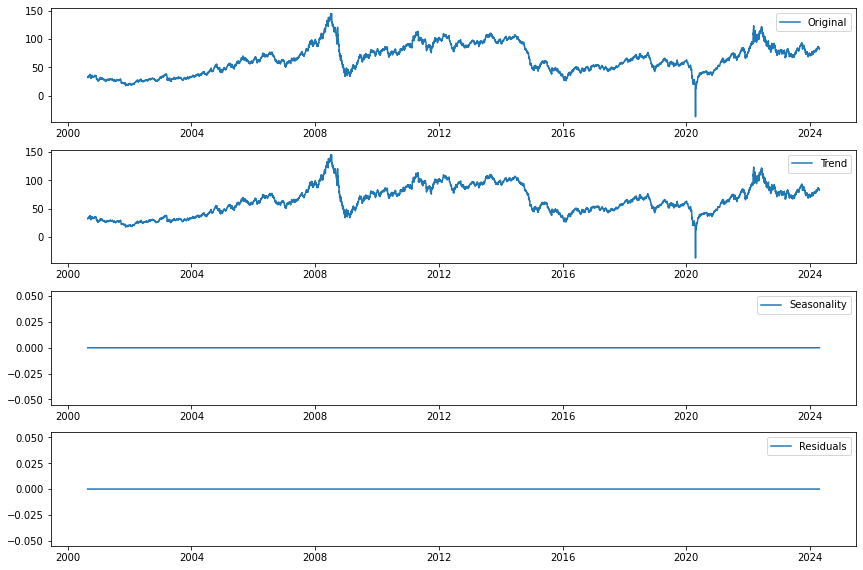

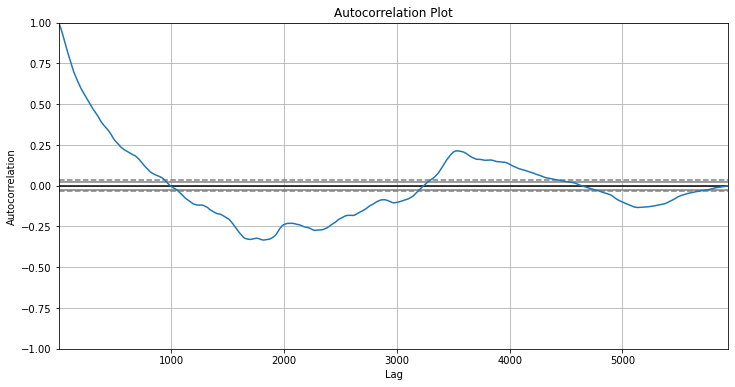

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Visual Inspection
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

# Autocorrelation plot
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(data['Adj Close'])
plt.title('Autocorrelation Plot')
plt.show()

# Machine Learning Models

## AutoRegressive Integrated Moving Average Model (ARIMA)

c:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

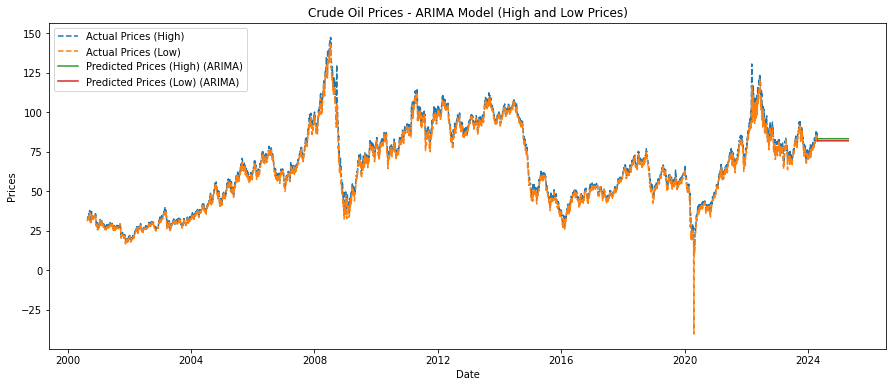

R-squared (High Price - ARIMA): -0.49737045078975983
RMSE (High Price - ARIMA): 6.838511641226986
R-squared (Low Price - ARIMA): -0.8243472555596068
RMSE (Low Price - ARIMA): 7.665858932188246


In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Define the number of future periods for predictions
steps = 365  # Change this value as needed

# Define the future index for predictions
future_index = pd.date_range(start=data.index[-1], periods=steps+1, closed='right')

# Extract High and Low prices from the 'data' DataFrame
y_high = data['High']
y_low = data['Low']

# Define the best ARIMA orders for High and Low prices
best_order_arima_high = (5, 1, 2)
best_order_arima_low = (5, 1, 2)

# Create and fit the ARIMA model for High Price
model_arima_high = ARIMA(y_high, order=best_order_arima_high)
results_arima_high = model_arima_high.fit()

# Create and fit the ARIMA model for Low Price
model_arima_low = ARIMA(y_low, order=best_order_arima_low)
results_arima_low = model_arima_low.fit()

# Make predictions on the dataset for High Price
predictions_arima_high = results_arima_high.predict(start=len(data), end=len(data)+steps-1, typ='levels')

# Make predictions on the dataset for Low Price
predictions_arima_low = results_arima_low.predict(start=len(data), end=len(data)+steps-1, typ='levels')

# Plot the actual vs predicted prices for both High and Low Prices
plt.figure(figsize=(15, 6))
plt.plot(data.index, y_high, label='Actual Prices (High)', linestyle='dashed')
plt.plot(data.index, y_low, label='Actual Prices (Low)', linestyle='dashed')
plt.plot(future_index, predictions_arima_high, label='Predicted Prices (High) (ARIMA)')
plt.plot(future_index, predictions_arima_low, label='Predicted Prices (Low) (ARIMA)')
plt.title('Crude Oil Prices - ARIMA Model (High and Low Prices)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# Calculate R-squared for High Price
r2_value_arima_high = r2_score(data['High'][-steps:], predictions_arima_high)

# Calculate RMSE for High Price
rmse_arima_high = sqrt(mean_squared_error(data['High'][-steps:], predictions_arima_high))

# Calculate R-squared for Low Price
r2_value_arima_low = r2_score(data['Low'][-steps:], predictions_arima_low)

# Calculate RMSE for Low Price
rmse_arima_low = sqrt(mean_squared_error(data['Low'][-steps:], predictions_arima_low))

# Print R-squared and RMSE values
print(f"R-squared (High Price - ARIMA): {r2_value_arima_high}")
print(f"RMSE (High Price - ARIMA): {rmse_arima_high}")

print(f"R-squared (Low Price - ARIMA): {r2_value_arima_low}")
print(f"RMSE (Low Price - ARIMA): {rmse_arima_low}")

## Facebook Prophet

15:44:22 - cmdstanpy - INFO - Chain [1] start processing
15:44:25 - cmdstanpy - INFO - Chain [1] done processing
15:44:27 - cmdstanpy - INFO - Chain [1] start processing
15:44:31 - cmdstanpy - INFO - Chain [1] done processing


Performance metrics for High Price:
MSE (Prophet): 355.5227921327132
MAE (Prophet): 17.76930543576839
RMSE (Prophet): 18.855312040184145
R-squared (Prophet): -10.383440068308122

Performance metrics for Low Price:
MSE (Prophet): 327.7294684590581
MAE (Prophet): 16.983143245843372
RMSE (Prophet): 18.10329993285915
R-squared (Prophet): -9.174225409126112


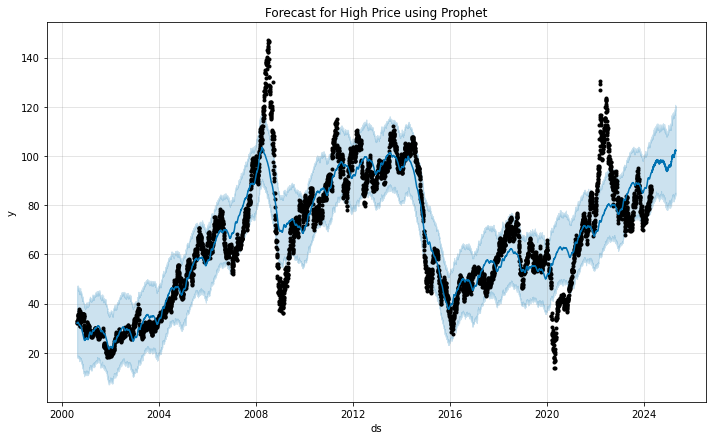

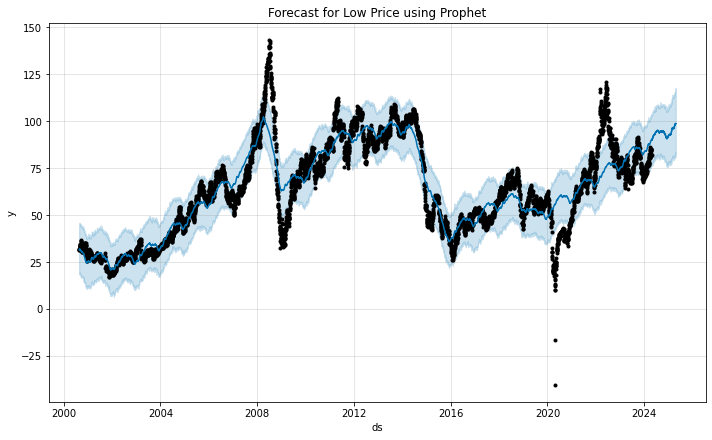

In [14]:
from prophet import Prophet

# Reset index to make 'Date' a column
data.reset_index(inplace=True)

# Prepare data for Prophet for High Price
prophet_data_high = data[['Date', 'High']].rename(columns={'Date': 'ds', 'High': 'y'})

# Initialize Prophet model for High Price
prophet_model_high = Prophet()

# Fit the Prophet model for High Price
prophet_model_high.fit(prophet_data_high)

# Make future predictions for High Price
future_high = prophet_model_high.make_future_dataframe(periods=steps)
prophet_predictions_high = prophet_model_high.predict(future_high)

# Plot the forecast for High Price
fig_high = prophet_model_high.plot(prophet_predictions_high)
plt.title('Forecast for High Price using Prophet')

# Prepare data for Prophet for Low Price
prophet_data_low = data[['Date', 'Low']].rename(columns={'Date': 'ds', 'Low': 'y'})

# Initialize Prophet model for Low Price
prophet_model_low = Prophet()

# Fit the Prophet model for Low Price
prophet_model_low.fit(prophet_data_low)

# Make future predictions for Low Price
future_low = prophet_model_low.make_future_dataframe(periods=steps)
prophet_predictions_low = prophet_model_low.predict(future_low)

# Plot the forecast for Low Price
fig_low = prophet_model_low.plot(prophet_predictions_low)
plt.title('Forecast for Low Price using Prophet')

# Evaluate performance for High Price
prophet_actual_high = data['High'].tail(steps)
prophet_forecast_high = prophet_predictions_high['yhat'].tail(steps)

mse_prophet_high = mean_squared_error(prophet_actual_high, prophet_forecast_high)
mae_prophet_high = mean_absolute_error(prophet_actual_high, prophet_forecast_high)
rmse_prophet_high = sqrt(mse_prophet_high)
r2_prophet_high = r2_score(prophet_actual_high, prophet_forecast_high)

print("Performance metrics for High Price:")
print(f'MSE (Prophet): {mse_prophet_high}')
print(f'MAE (Prophet): {mae_prophet_high}')
print(f'RMSE (Prophet): {rmse_prophet_high}')  # RMSE calculated here
print(f'R-squared (Prophet): {r2_prophet_high}')

# Evaluate performance for Low Price
prophet_actual_low = data['Low'].tail(steps)
prophet_forecast_low = prophet_predictions_low['yhat'].tail(steps)

mse_prophet_low = mean_squared_error(prophet_actual_low, prophet_forecast_low)
mae_prophet_low = mean_absolute_error(prophet_actual_low, prophet_forecast_low)
rmse_prophet_low = sqrt(mse_prophet_low)
r2_prophet_low = r2_score(prophet_actual_low, prophet_forecast_low)

print("\nPerformance metrics for Low Price:")
print(f'MSE (Prophet): {mse_prophet_low}')
print(f'MAE (Prophet): {mae_prophet_low}')
print(f'RMSE (Prophet): {rmse_prophet_low}')  # RMSE calculated here
print(f'R-squared (Prophet): {r2_prophet_low}')


## Long Short Term Model (LSTM)

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare data
lookback = 20
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['High', 'Low']].values)

def create_dataset(dataset, lookback):
    X, Y = [], []
    for i in range(len(dataset) - lookback):
        X.append(dataset[i:(i + lookback)])
        Y.append(dataset[i + lookback])
    return np.array(X), np.array(Y)

X, Y = create_dataset(scaled_data, lookback)

# Reshape data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 2))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=30, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=2))  # 2 output units for High and Low
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=10, batch_size=1)

# Make predictions
predictions = model.predict(X)

# Inverse scaling for actual values
actual_values = scaler.inverse_transform(Y)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions)

# Calculate metrics
mse_lstm = mean_squared_error(actual_values, predictions)
mae_lstm = mean_absolute_error(actual_values, predictions)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(actual_values, predictions)

print("\nPerformance metrics for LSTM Model:")
print(f'MSE (LSTM): {mse_lstm}')
print(f'MAE (LSTM): {mae_lstm}')
print(f'RMSE (LSTM): {rmse_lstm}')
print(f'R-squared (LSTM): {r2_lstm}')

Epoch 1/10
5921/5921 [==============================] - 27s 4ms/step - loss: 0.0012
Epoch 2/10
5921/5921 [==============================] - 25s 4ms/step - loss: 2.0899e-04
Epoch 3/10
5921/5921 [==============================] - 25s 4ms/step - loss: 1.4139e-04
Epoch 4/10
5921/5921 [==============================] - 26s 4ms/step - loss: 1.2671e-04
Epoch 5/10
5921/5921 [==============================] - 25s 4ms/step - loss: 1.2432e-04
Epoch 6/10
5921/5921 [==============================] - 27s 5ms/step - loss: 1.1468e-04
Epoch 7/10
5921/5921 [==============================] - 29s 5ms/step - loss: 1.1392e-04
Epoch 8/10
5921/5921 [==============================] - 31s 5ms/step - loss: 1.1125e-04
Epoch 9/10
5921/5921 [==============================] - 28s 5ms/step - loss: 1.0816e-04
Epoch 10/10
186/186 [==============================] - 1s 2ms/step

Performance metrics for LSTM Model:
MSE (LSTM): 6.17352174615792
MAE (LSTM): 1.9778221153443858
RMSE (LSTM): 2.4846572693548543
R-squared (LSTM)

## Model Comparision

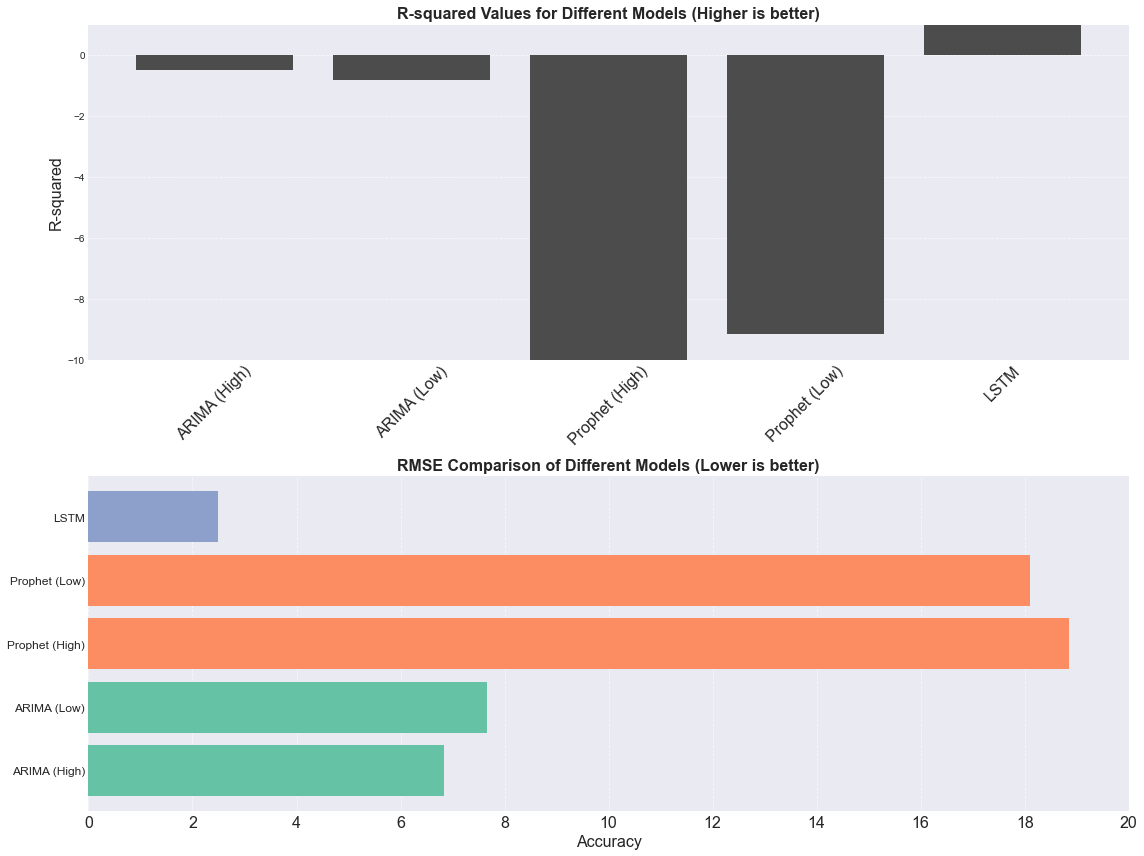

In [32]:
# R-squared values for each model
models = ['ARIMA (High)', 'ARIMA (Low)', 'Prophet (High)', 'Prophet (Low)', 'LSTM']
r_squared_values = [r2_value_arima_high, r2_value_arima_low, r2_prophet_high, r2_prophet_low, r2_lstm]  # Example values, replace with actual values

# Accuracy values for each model
accuracies = [rmse_arima_high, rmse_arima_low, rmse_prophet_high, rmse_prophet_low, rmse_lstm]  # Example values, replace with actual values
model_colors = ['#66c2a5', '#66c2a5', '#fc8d62', '#fc8d62', '#8da0cb'] # Darker colors for each model
rsquared_color = '#4c4c4c'  # Darker color for R-squared plot

# Plot size and style
plt.figure(figsize=(16, 12))
plt.style.use('seaborn-dark')

# Plot R-squared values
plt.subplot(2, 1, 1)
plt.bar(models, r_squared_values, color=rsquared_color)  # Change color here
plt.title('R-squared Values for Different Models (Higher is better)', fontsize=16, fontweight='bold')
plt.ylabel('R-squared', fontsize=16)
plt.ylim([-10, 1])  # Adjust y-axis limits if needed
plt.xticks(rotation=45, fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot accuracy comparison
plt.subplot(2, 1, 2)
plt.barh(models, accuracies, color=model_colors)
plt.title('RMSE Comparison of Different Models (Lower is better)', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy', fontsize=16)
plt.xlim([0, 20])  # Adjust x-axis limits if needed
plt.xticks(np.arange(0, 21, 2), fontsize=16)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


## Exploring Possibilities (Trading Setup)

   Entry Date  Entry Price  Shares Purchased Position  Exit Date  Exit Price  \
0  2020-01-02    61.180000                61     Long 2020-01-10   58.744801   
1  2020-01-13    58.080002                64     Long 2020-01-15   57.520951   
2  2020-05-08    24.740000               151     Long 2020-09-08   36.576198   
3  2020-10-14    41.040001                91     Long 2020-10-26   38.367201   
4  2020-11-11    41.450001                90     Long 2020-11-13   39.929351   
5  2020-11-16    41.340000                90     Long 2021-03-31   58.864200   
6  2021-04-15    63.459999                59     Long 2021-04-21   61.043248   
7  2021-04-22    61.430000                61     Long 2021-07-20   67.082898   
8  2021-07-28    72.389999                51     Long 2021-08-04   67.809252   
9  2021-09-10    69.720001                53     Long 2021-11-19   75.719498   
10 2021-12-30    76.989998                48     Long 2022-04-07   95.549849   
11 2022-04-18   108.209999              

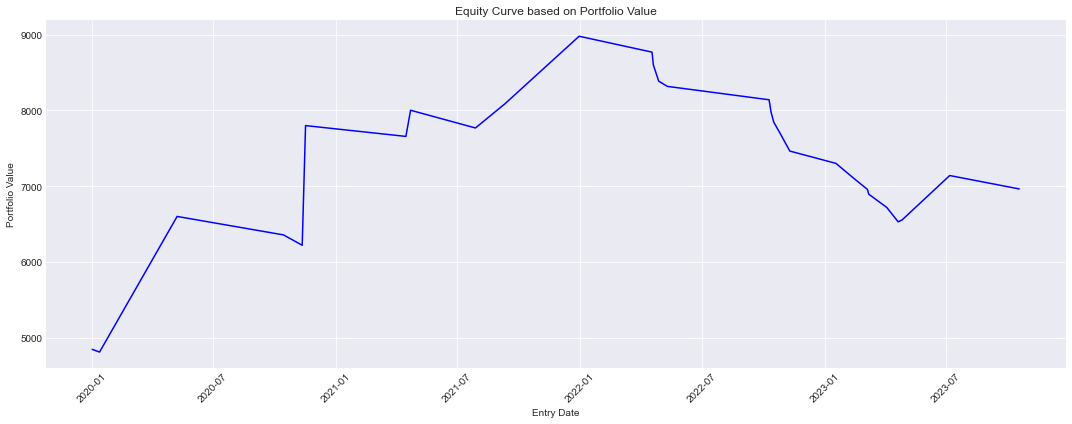

In [29]:
from ta.trend import MACD
from ta.momentum import RSIIndicator

# Calculate MACD
macd_indicator = MACD(data['Close'])
data['MACD'] = macd_indicator.macd()

# Calculate RSI
rsi_indicator = RSIIndicator(data['Close'])
data['RSI'] = rsi_indicator.rsi()

# Backtest parameters
initial_capital = 5000
capital_allocation = 0.75
stop_loss_pct = 0.03
slippage_pct = 0.005

import math

# Filter data for the year 2020 and onwards
data_2020 = data[data['Date'] >= '2020-01-01']

# Initialize trade journal
trade_journal = []

# Backtest the trade setup
capital = initial_capital
position_size = capital * capital_allocation
in_position = False

for index, row in data_2020.iterrows():
    if row['MACD'] > 0 and row['RSI'] > 11 and not in_position:
        entry_price = row['Close']
        stop_loss = entry_price * (1 - stop_loss_pct)
        in_position = True
        shares_purchased = math.floor(position_size / entry_price)  # Round down the number of shares purchased
        trade_entry = {'Entry Date': row['Date'], 'Entry Price': entry_price, 'Shares Purchased': shares_purchased, 'Position': 'Long'}
    elif in_position and (row['Close'] <= stop_loss or row['MACD'] <= 0):
        exit_price = row['Close'] * (1 - slippage_pct)
        profit_loss = (exit_price - entry_price) * shares_purchased  # Calculate P/L based on rounded down shares
        capital += profit_loss
        in_position = False
        trade_entry['Exit Date'] = row['Date']
        trade_entry['Exit Price'] = exit_price
        trade_entry['P/L'] = profit_loss
        trade_entry['Portfolio'] = capital  # Include portfolio after each position
        trade_journal.append(trade_entry)

# Convert trade journal to DataFrame
trade_journal_df = pd.DataFrame(trade_journal)
print(trade_journal_df)


# Set custom style
plt.style.use('seaborn-darkgrid')

# Plot the equity curve based on portfolio value
plt.figure(figsize=(15, 6))
plt.plot(trade_journal_df['Entry Date'], trade_journal_df['Portfolio'], color='blue', linewidth=2)

# Add title and labels with adjusted font sizes
plt.title('Equity Curve based on Portfolio Value', fontsize=16)
plt.xlabel('Entry Date', fontsize=14)
plt.ylabel('Portfolio Value', fontsize=14)

# Adjust tick parameters
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

trade_journal_df.to_excel(r"C:\Users\putta\OneDrive - St. Clair College\Semester 4\DAB422 - Capstone Project 2\Presentation\Trade Journal.xlsx")

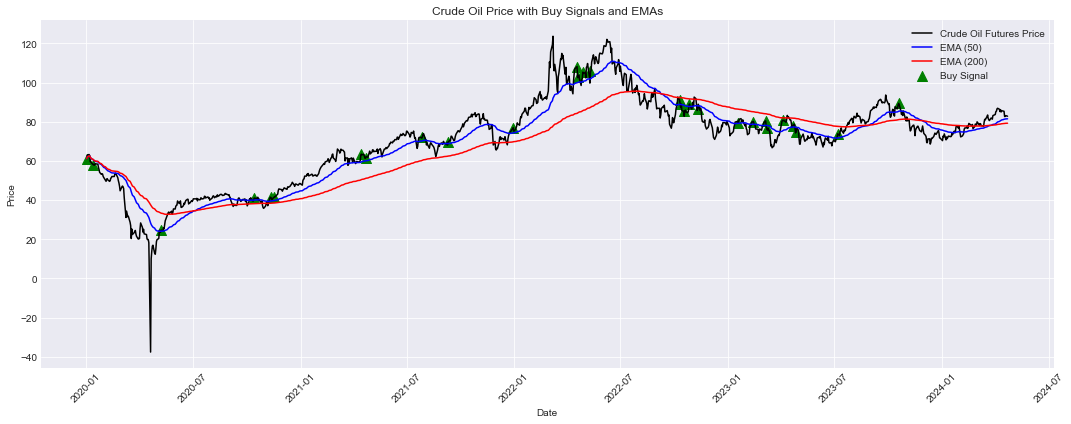

In [28]:
import matplotlib.pyplot as plt

# Plotting the price of crude oil
plt.figure(figsize=(15, 6))
plt.plot(data_2020['Date'], data_2020['Close'], color='black', label='Crude Oil Futures Price')

# Plotting Exponential Moving Averages (EMAs)
plt.plot(data_2020['Date'], data_2020['Close'].ewm(span=50).mean(), color='blue', label='EMA (50)')
plt.plot(data_2020['Date'], data_2020['Close'].ewm(span=200).mean(), color='red', label='EMA (200)')

# Plotting buy signals with larger markers
buy_signals = trade_journal_df[trade_journal_df['Position'] == 'Long']
plt.scatter(buy_signals['Entry Date'], buy_signals['Entry Price'], color='green', marker='^', label='Buy Signal', s=100)

plt.title('Crude Oil Price with Buy Signals and EMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## User Communication Demo

In [19]:
# !pip install python-telegram-bot
# !pip install schedule

In [20]:
import logging
from datetime import datetime
from telegram import InlineKeyboardButton, InlineKeyboardMarkup
from telegram.ext import Updater, CommandHandler, CallbackQueryHandler
import yfinance as yf

# Set up logging
logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
                     level=logging.INFO)

logger = logging.getLogger(__name__)

# Your Yahoo! Finance symbol for WTI Crude Oil Future Contracts (CL=F)
symbol = "CL=F"

# Function to fetch and send the open price
def send_open_price(context, query):
    try:
        open_price = yf.download(symbol, period='1d')['Open'][-1]
        message = f"Today's Open price for {symbol} is: ${open_price:.2f}"
        query.message.reply_text(message)
    except Exception as e:
        logger.error(f"Error fetching open price: {e}")
        query.message.reply_text("Failed to fetch open price. Please try again later.")

# Function to fetch and send the close price
def send_current_price(context, query):
    try:
        close_price = yf.download(symbol, period='1d')['Close'][-1]
        message = f"Current LTP (Last Traded Price) for {symbol} is: ${close_price:.2f}"
        query.message.reply_text(message)
    except Exception as e:
        logger.error(f"Error fetching Current LTP (Last Traded Price) price: {e}")
        query.message.reply_text("Failed to fetch Current LTP (Last Traded Price). Please try again later.")

def send_stop_loss(context, query, stop_loss_percentage):
    try:
        data = yf.download(symbol, period='1d')
        day_high = data['High'][-1]
        stop_loss = day_high * (1 - stop_loss_percentage / 100)
        message = f"Today's stop-loss level for {symbol} based on a {stop_loss_percentage}% stop-loss is: ${stop_loss:.2f}"
        query.message.reply_text(message)
    except Exception as e:
        logger.error(f"Error fetching stop-loss level: {e}")
        query.message.reply_text("Failed to fetch stop-loss level. Please try again later.")

# Function to handle placing an order
def place_order(update, context):
    close_price = yf.download(symbol, period='1d')['Close'][-1]
    query = update.callback_query
    message = f"Order placed at Current LTP (Last Traded Price) for {symbol} at ${close_price:.2f}"
    query.message.reply_text(message)

# Define the /start command handler
def start(update, context):
    keyboard = [
        [InlineKeyboardButton("Get Today's Open Price", callback_data='get_open_price')],
        [InlineKeyboardButton("Get Current LTP (Last Traded Price)", callback_data='get_close_price')],
        [InlineKeyboardButton("Get Stop Loss (3%)", callback_data='get_stop_loss_3_percent')],
        [InlineKeyboardButton("Place the order", callback_data='place_order')]
    ]
    reply_markup = InlineKeyboardMarkup(keyboard)
    update.message.reply_text('Welcome! Click the button below to get today\'s open price, close price, or stop-loss level for WTI Crude Oil Future Contracts (CL=F).', reply_markup=reply_markup)


# Define the callback query handler
def button_click(update, context):
    query = update.callback_query
    if query.data == 'get_open_price':
        # Fetch and send open price
        send_open_price(context, query)
    elif query.data == 'get_close_price':
        # Fetch and send close price
        send_current_price(context, query)
    elif query.data == 'get_stop_loss_3_percent':
        # Fetch and send stop-loss level with 3% below day's high
        send_stop_loss(context, query, 3)
    elif query.data == 'place_order':
        # Place the order
        place_order(update, context)

# Define the main function to run the bot
def main():
    # Create an Updater object
    updater = Updater("7014305622:AAGKmvJgFx5h5MjGJ2bRzeyCjAp36j6J4Do", use_context=True)

    # Get the dispatcher to register handlers
    dp = updater.dispatcher

    # Add command handlers
    dp.add_handler(CommandHandler("start", start))
    dp.add_handler(CallbackQueryHandler(button_click))

    # Start the Bot
    updater.start_polling()

    # Run the bot until you press Ctrl-C to stop it
    updater.idle()

# Entry point of the program
if __name__ == '__main__':
    main()

2024-04-23 15:49:15,865 - apscheduler.scheduler - INFO - Scheduler started
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2024-04-23 16:02:03,079 - telegram.ext.updater - INFO - Received signal 2 (SIGINT), stopping...
2024-04-23 16:02:03,080 - apscheduler.scheduler - INFO - Scheduler has been shut down
